In [3]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import librosa
import librosa.display

# to play the audio files
from IPython.display import Audio

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import keras
from keras.models import Sequential
from keras.layers import Dense,Conv1D,MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.utils import np_utils,to_categorical

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [5]:
Ravdness= "Ravdness/"
Savee= "Savee/"
Crema= "Crema/"
Tess = "Tess/"

In [14]:
ravdness_dir_list= os.listdir(Ravdness)

In [15]:
ravdness_dir_list.remove('.DS_Store')


In [16]:
ravdness_dir_list

['Actor_16',
 'Actor_11',
 'Actor_18',
 'Actor_20',
 'Actor_21',
 'Actor_19',
 'Actor_10',
 'Actor_17',
 'Actor_04',
 'Actor_03',
 'Actor_02',
 'Actor_05',
 'Actor_12',
 'Actor_15',
 'Actor_23',
 'Actor_24',
 'Actor_22',
 'Actor_14',
 'Actor_13',
 'Actor_09',
 'Actor_07',
 'Actor_06',
 'Actor_01',
 'Actor_08']

In [17]:
file_emotion=[]
file_path=[]

for dir in ravdness_dir_list:
    actor = os.listdir(Ravdness+dir)
    for file in actor:
        part= file.split('.')[0]
        part= part.split('-')
        
        file_emotion.append(int(part[2]))
        file_path.append(Ravdness+dir+'/'+file)
        

In [18]:
df_emotion = pd.DataFrame(file_emotion,columns=["Emotion"])

In [19]:
df_emotion.head()

Emotion
0        5
1        6
2        6
3        5
4        7

In [20]:
df_path = pd.DataFrame(file_path,columns=["Path"])

In [21]:
df_ravdness = pd.concat([df_emotion,df_path],axis=1)

In [22]:
emotion_mapping= {1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}

df_ravdness['Emotion']= df_ravdness['Emotion'].map(emotion_mapping)

In [23]:
df_ravdness.head()

Emotion                                        Path
0    angry  Ravdness/Actor_16/03-01-05-01-02-01-16.wav
1     fear  Ravdness/Actor_16/03-01-06-01-02-02-16.wav
2     fear  Ravdness/Actor_16/03-01-06-02-01-02-16.wav
3    angry  Ravdness/Actor_16/03-01-05-02-01-01-16.wav
4  disgust  Ravdness/Actor_16/03-01-07-01-01-01-16.wav

SAVEE DATASET

In [24]:
savee_dir_list= os.listdir(Savee)

In [26]:
savee_dir_list[:5]

['JK_sa01.wav', 'JK_sa15.wav', 'DC_n13.wav', 'DC_su09.wav', 'DC_n07.wav']

In [27]:
file_emotion=[]
file_path=[]
for file in savee_dir_list:
    file_path.append(Savee+file)
    part = file.split('_')[1]
    prefix = part[:-6]
    if prefix=='a':
        file_emotion.append('angry')
    elif prefix=='d':
        file_emotion.append('disgust')
    elif prefix=='f':
        file_emotion.append('fear')
    elif prefix=='h':
        file_emotion.append('happy')
    elif prefix=='n':
        file_emotion.append('neutral')
    elif prefix=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        

In [28]:
file_emotion[:5]

['sad', 'sad', 'neutral', 'surprise', 'neutral']

In [29]:
df_emotion=pd.DataFrame(file_emotion,columns=["Emotion"])
df_path= pd.DataFrame(file_path,columns=["Path"])

df_savee = pd.concat([df_emotion,df_path],axis=1)

df_savee.head()

Emotion               Path
0       sad  Savee/JK_sa01.wav
1       sad  Savee/JK_sa15.wav
2   neutral   Savee/DC_n13.wav
3  surprise  Savee/DC_su09.wav
4   neutral   Savee/DC_n07.wav

TESS Dataset

In [30]:
tess_dir_list= os.listdir(Tess)

In [32]:
tess_dir_list.remove('.ipynb_checkpoints')

In [33]:
file_emotion=[]
file_path=[]

for dir in tess_dir_list:
    sub_dir= os.listdir(Tess+dir)
    for file in sub_dir:
        part= file.split('.')[0]
        part=part.split('_')[2]
        if part=='ps':
            file_emotion.append('Surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess+dir+'/'+file)
        

In [34]:
file_emotion[:5]

['disgust', 'disgust', 'disgust', 'disgust', 'disgust']

In [35]:
df_emotion= pd.DataFrame(file_emotion,columns=["Emotion"])
df_path=pd.DataFrame(file_path,columns=["Path"])

df_tess= pd.concat([df_emotion,df_path],axis=1)
df_tess.head()

Emotion                                    Path
0  disgust   Tess/YAF_disgust/YAF_date_disgust.wav
1  disgust    Tess/YAF_disgust/YAF_rag_disgust.wav
2  disgust  Tess/YAF_disgust/YAF_raise_disgust.wav
3  disgust  Tess/YAF_disgust/YAF_ditch_disgust.wav
4  disgust   Tess/YAF_disgust/YAF_door_disgust.wav

Crema dataset

In [36]:
crema_dir_list= os.listdir(Crema)

In [37]:
file_emotion=[]
file_path=[]

for file in crema_dir_list:
    file_path.append(Crema+file)
    
    part= file.split('_')[2]
    if part == 'SAD':
        file_emotion.append('sad')
    elif part == 'ANG':
        file_emotion.append('angry')
    elif part == 'DIS':
        file_emotion.append('disgust')
    elif part == 'FEA':
        file_emotion.append('fear')
    elif part == 'HAP':
        file_emotion.append('happy')
    elif part == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

In [38]:
file_emotion[:5]

['angry', 'angry', 'neutral', 'neutral', 'disgust']

In [39]:
df_emotion=pd.DataFrame(file_emotion,columns=["Emotion"])
df_path=pd.DataFrame(file_path,columns=["Path"])

df_crema= pd.concat([df_emotion,df_path],axis=1)
df_crema.head()

Emotion                       Path
0    angry  Crema/1022_ITS_ANG_XX.wav
1    angry  Crema/1037_ITS_ANG_XX.wav
2  neutral  Crema/1060_ITS_NEU_XX.wav
3  neutral  Crema/1075_ITS_NEU_XX.wav
4  disgust  Crema/1073_IOM_DIS_XX.wav

Combine all dataframes

In [40]:
df= pd.concat([df_ravdness,df_savee,df_tess,df_crema],axis=0)

In [41]:
df.to_csv("data.csv",index=False)
df.head()

Emotion                                        Path
0    angry  Ravdness/Actor_16/03-01-05-01-02-01-16.wav
1     fear  Ravdness/Actor_16/03-01-06-01-02-02-16.wav
2     fear  Ravdness/Actor_16/03-01-06-02-01-02-16.wav
3    angry  Ravdness/Actor_16/03-01-05-02-01-01-16.wav
4  disgust  Ravdness/Actor_16/03-01-07-01-01-01-16.wav

EDA

In [42]:
df_copy=df.copy()
df['Emotion'].replace({'Surprise':'surprise'},inplace=True)

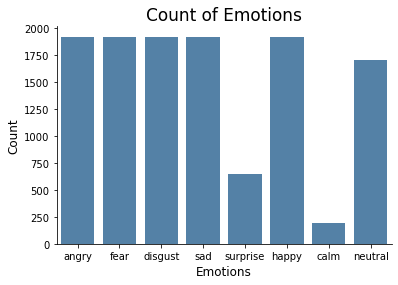

In [43]:
plt.title("Count of Emotions",size=17)
sns.countplot(df['Emotion'],color='steelblue')
plt.xlabel("Emotions",size=12)
plt.ylabel("Count",size=12)
sns.despine(top=True,bottom=False,left=False);

We can also plot waveplots and spectograms for audio signals

Waveplots - Waveplots let us know the loudness of the audio at a given time.


Spectograms - A spectrogram is a visual representation of the spectrum of frequencies of sound or other signals as they vary with time. It’s a representation of frequencies changing with respect to time for given audio/music signals.

In [44]:
def create_waveplot(data,sampling_rate,emotion):
    plt.figure(figsize=(12,5))
    plt.title("Waveplot for audio with {} emotion".format(emotion),size=17)
    librosa.display.waveshow(data,sr=sampling_rate)
    plt.show()
    
def create_spectrogram(data,sampling_rate,emotion):
    # stft function converts the data into short term fourier transform
    X= librosa.stft(data)
    Xdb= librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12,5))
    plt.title("Spectogram for audio with {} emotion".format(emotion),size=17)
    librosa.display.specshow(Xdb,sr=sampling_rate,x_axis="time",y_axis="hz")
    plt.colorbar()
    

In [45]:
temp=np.array(df[df["Emotion"]=="happy"]["Path"])[0]
temp

'Ravdness/Actor_16/03-01-03-02-02-02-16.wav'

In [46]:
librosa.load(temp)

(array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -5.7374714e-09,  4.6759210e-09,  0.0000000e+00], dtype=float32),
 22050)

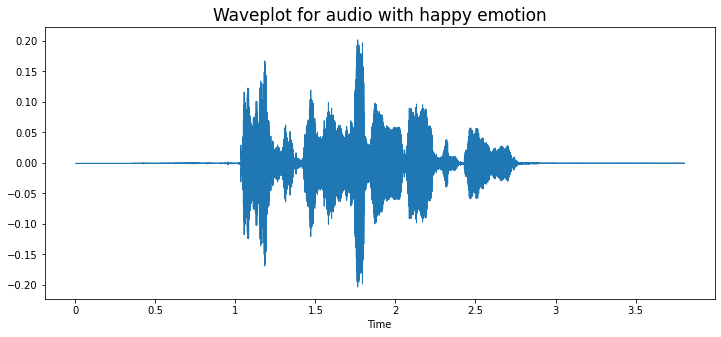

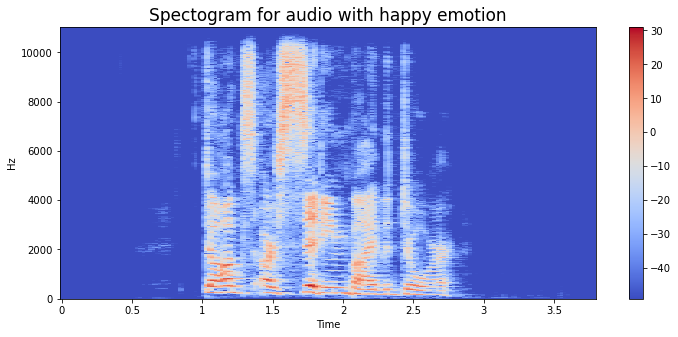

In [49]:
emotion="happy"

path= np.array(df[df["Emotion"]==emotion]["Path"])[0]
data,sampling_rate= librosa.load(path)
create_waveplot(data,sampling_rate,emotion)
create_spectrogram(data,sampling_rate,emotion)
Audio(path)

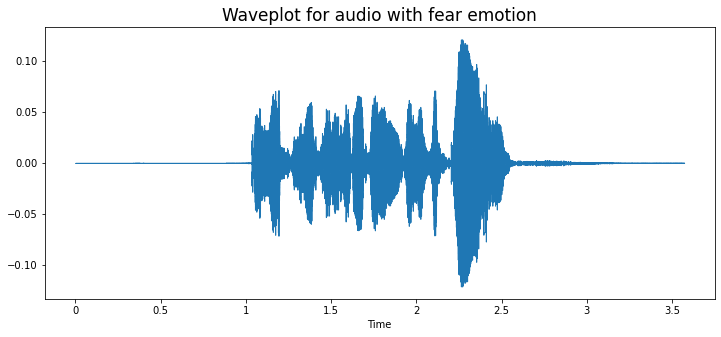

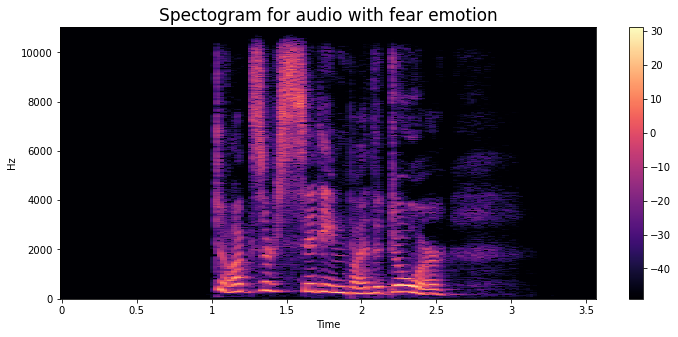

In [50]:
emotion="fear"

path= np.array(df[df["Emotion"]==emotion]["Path"])[0]
data,sampling_rate= librosa.load(path)
create_waveplot(data,sampling_rate,emotion)
create_spectrogram(data,sampling_rate,emotion)
Audio(path)

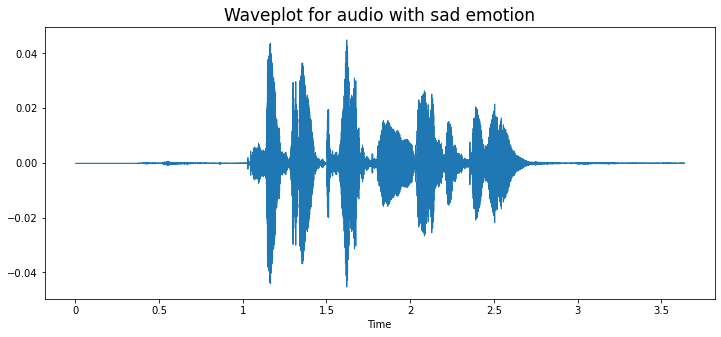

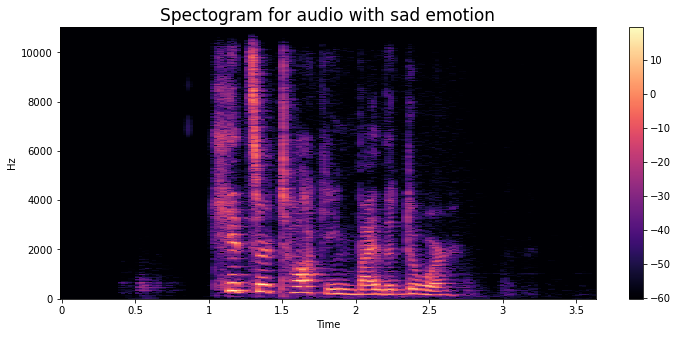

In [51]:
emotion="sad"

path= np.array(df[df["Emotion"]==emotion]["Path"])[0]
data,sampling_rate= librosa.load(path)
create_waveplot(data,sampling_rate,emotion)
create_spectrogram(data,sampling_rate,emotion)
Audio(path)

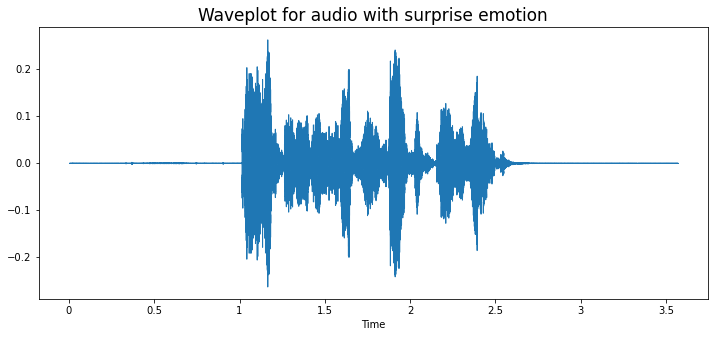

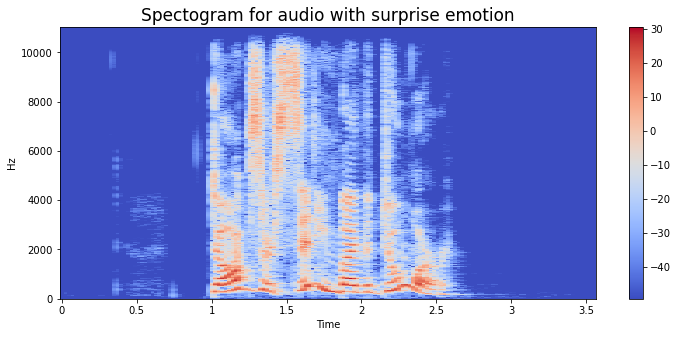

In [52]:
emotion="surprise"

path= np.array(df[df["Emotion"]==emotion]["Path"])[0]
data,sampling_rate= librosa.load(path)
create_waveplot(data,sampling_rate,emotion)
create_spectrogram(data,sampling_rate,emotion)
Audio(path)

Data Augmentation
Data augmentation is the process by which we create new synthetic data samples by adding small perturbations on our initial training set.

To generate syntactic data for audio, we can apply noise injection, shifting time, changing pitch and speed.

The objective is to make our model invariant to those perturbations and enhace its ability to generalize.

In order to this to work adding the perturbations must conserve the same label as the original training sample.

In images data augmention can be performed by shifting the image, zooming, rotating ...

First, let's check which augmentation techniques works better for our dataset.

In [53]:
data

array([ 1.97388023e-10, -2.77809886e-09,  6.41419584e-09, ...,
       -4.48119181e-11,  1.05277636e-11,  0.00000000e+00], dtype=float32)

In [54]:
def noise(data):
    noise_amp = 0.025*np.random.uniform()*np.amax(data)
    data=data+noise_amp*np.random.normal(size=data.shape[0])
    return data

def pitch(data,sampling_rate,pitch_factor=0.8):
    return librosa.effects.pitch_shift(data,sampling_rate,pitch_factor)

def shift(data):
    shift_range = int(np.random.uniform(low=-7, high = 7)*1000)
    return np.roll(data, shift_range)

def stretch(data,rate=0.9):
    return librosa.effects.time_stretch(data,rate)

path=np.array(df.Path)[1]
data,sample_rate= librosa.load(path)

1. Original Audio

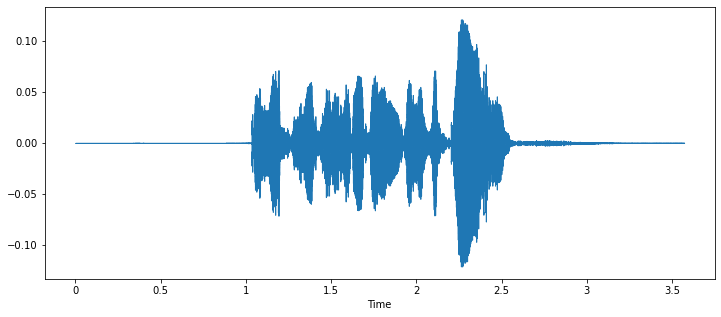

In [55]:
plt.figure(figsize=(12,5))
librosa.display.waveshow(data,sr=sample_rate)
Audio(path)

2. Audio After Noice Injection

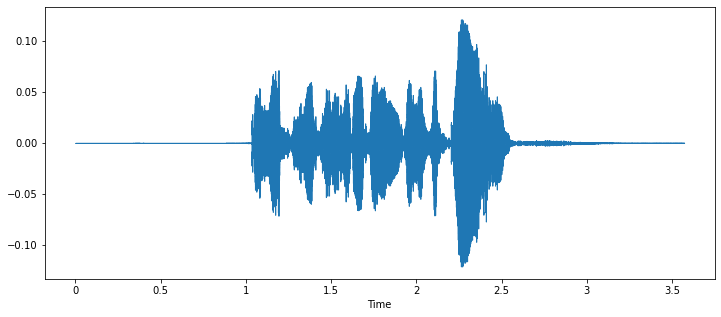

In [56]:
noice_data= noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(data,sr=sample_rate)
Audio(noice_data,rate=sample_rate)

3. Audio Shift

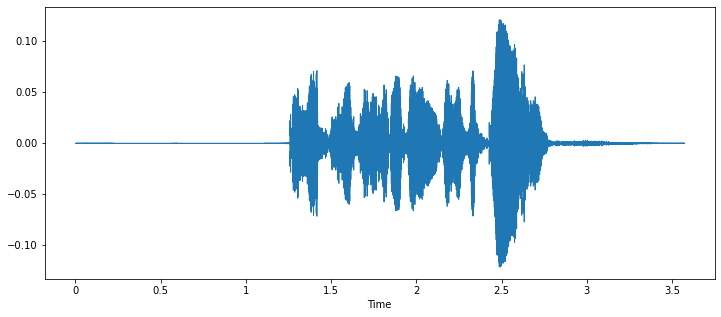

In [57]:
data_shift= shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(data_shift,sr=sample_rate)
Audio(data_shift,rate=sample_rate)

4. Audio Stretch

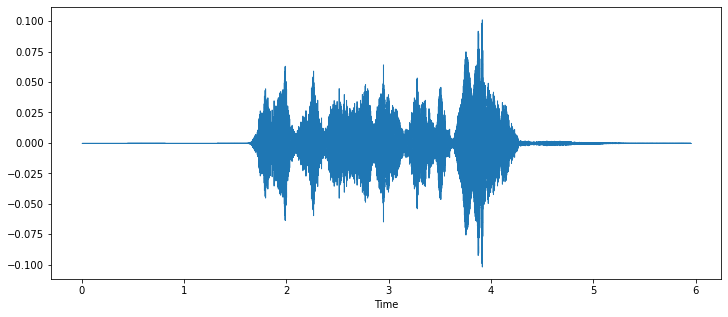

In [58]:
data_stretch= stretch(data,rate=0.6)
plt.figure(figsize=(12,5))
librosa.display.waveshow(data_stretch,sr=sample_rate)
Audio(data_stretch,rate=sample_rate)

5. Audio Pitch

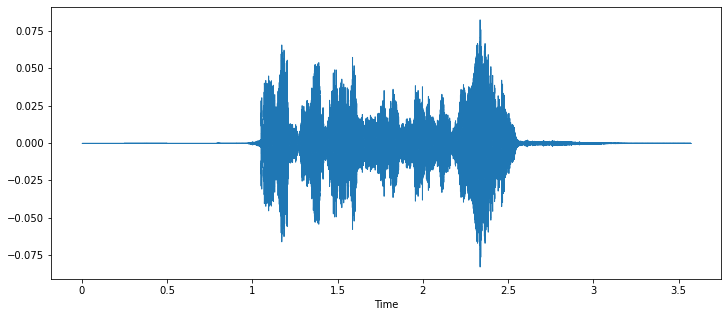

In [59]:
data_pitch= pitch(data,sample_rate,0.5)
plt.figure(figsize=(12,5))
librosa.display.waveshow(data_pitch,sr=sample_rate)
Audio(data_pitch,rate=sample_rate)

From the above types of augmentation techniques i am using noise, stretching(ie. changing speed) and some pitching.

Feature Extraction


Extraction of features is a very important part in analyzing and finding relations between different things. 

As we already know that the data provided of audio cannot be understood by the models directly so we need to convert them into an understandable format for which feature extraction is used.

The audio signal is a three-dimensional signal in which three axes represent time, amplitude and frequency.

<img src="https://miro.medium.com/max/633/1*7sKM9aECRmuoqTadCYVw9A.jpeg"/>

In [60]:
def extract_features(data):
    # Zero Crossing Rate
    
    result=np.array([])
    
    zcr=np.mean(librosa.feature.zero_crossing_rate(data).T,axis=0)
    result=np.hstack((result,zcr))
    
    #Chroma_Stft
    
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result
    
    

In [61]:
np.array(extract_features(data)[:20])

array([ 2.12424538e-01,  5.51800132e-01,  5.10277808e-01,  4.80480254e-01,
        4.46299702e-01,  3.84138763e-01,  4.03150052e-01,  4.07664001e-01,
        4.27179545e-01,  4.73491579e-01,  5.45150876e-01,  5.62913001e-01,
        5.59973657e-01, -5.51948120e+02,  3.88314400e+01, -7.56018877e+00,
        6.31620455e+00, -3.57922673e+00, -7.85105181e+00, -1.59844160e+01])

In [62]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [200]:
X,Y= [],[]

for path,emotion in zip(df["Path"],df["Emotion"]):
    feature= get_features(path)
    
    for val in feature:
        X.append(val)
        Y.append(emotion)

In [204]:
len(X)

36486

In [205]:
len(Y)

36486

In [207]:
df["Path"].shape

(12162,)

In [209]:
Y[:10]

['angry',
 'angry',
 'angry',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'angry']

In [210]:
features = pd.DataFrame(X)
features["labels"]=Y
features.to_csv("features.csv",index=False)
features.head()

0         1         2         3         4         5         6  \
0  0.192464  0.516620  0.464575  0.484971  0.538362  0.500001  0.598386   
1  0.266308  0.588017  0.566002  0.600730  0.602344  0.592289  0.643344   
2  0.226546  0.577087  0.478307  0.476140  0.506183  0.482258  0.537989   
3  0.184814  0.552939  0.514264  0.477355  0.408057  0.359502  0.394911   
4  0.308784  0.734920  0.739648  0.729364  0.711060  0.659011  0.653297   

          7         8         9  ...       153       154       155       156  \
0  0.544128  0.527744  0.602507  ...  0.006685  0.004040  0.004858  0.004599   
1  0.567626  0.591652  0.687198  ...  0.006771  0.004083  0.004897  0.004646   
2  0.570243  0.533903  0.587693  ...  0.003240  0.002368  0.001085  0.000946   
3  0.405739  0.433439  0.497811  ...  0.002602  0.002953  0.003854  0.003141   
4  0.575941  0.575158  0.593249  ...  0.002967  0.003341  0.004161  0.003606   

        157       158       159       160           161  labels  
0  0.005219  0.003749  0.000923  0.000175  1.708295e-06   angry  
1  0.005262  0.003788  0.000978  0.000228  5.386832e-05   angry  
2  0.000686  0.000396  0.000168  0.000018  6.272384e-08   angry  
3  0.002715  0.001565  0.000508  0.000056  7.527195e-07    fear  
4  0.003147  0.001959  0.000914  0.000437  4.019086e-04    fear  

[5 rows x 163 columns]

In [211]:
features.shape

(36486, 163)

In [213]:
X[:1]

[array([ 1.92464193e-01,  5.16620457e-01,  4.64574784e-01,  4.84971434e-01,
         5.38362145e-01,  5.00001192e-01,  5.98385751e-01,  5.44127822e-01,
         5.27743638e-01,  6.02507472e-01,  6.27820551e-01,  6.16499960e-01,
         5.99417984e-01, -4.42239655e+02,  5.50632362e+01, -9.42134476e+00,
         7.01987886e+00, -1.85303936e+01, -7.17252493e+00, -1.66234398e+01,
        -1.56964521e+01, -2.11141605e+01,  2.59504080e-01, -1.40679207e+01,
        -7.06661749e+00, -7.43842745e+00, -6.30661440e+00, -1.17652082e+01,
        -6.34824944e+00, -5.58307409e+00, -8.71648026e+00, -1.11283083e+01,
        -1.68522573e+00,  1.86869409e-02,  2.96468079e-05,  1.43484227e-04,
         2.35352694e-04,  2.12344909e-04,  1.42077776e-03,  2.37771552e-02,
         6.60310388e-02,  4.01816249e-01,  8.08886588e-01,  2.03573868e-01,
         1.86636910e-01,  6.17786646e-01,  2.81607091e-01,  1.22369066e-01,
         1.19166724e-01,  4.24228042e-01,  7.26250947e-01,  6.22547686e-01,
         6.2

Data Preparation

In [63]:
features=pd.read_csv('features.csv')
X = features.iloc[: ,:-1].values
Y = features['labels'].values

In [64]:
Y

array(['angry', 'angry', 'angry', ..., 'neutral', 'neutral', 'neutral'],
      dtype=object)

In [65]:
# As this is a multiclass classification problem onehotencoding our Y.
ohe = OneHotEncoder()
Y= ohe.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [66]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 8), (9122, 162), (9122, 8))

In [67]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 8), (9122, 162), (9122, 8))

In [68]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162, 1), (27364, 8), (9122, 162, 1), (9122, 8))

In [69]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 162, 256)          1536      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 81, 256)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 81, 256)           327936    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 41, 256)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 41, 128)           163968    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 21, 128)          0

2023-01-05 16:32:03.732603: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [70]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
428/428 [==============================] - 55s 128ms/step - loss: 1.6623 - accuracy: 0.3365 - val_loss: 1.3995 - val_accuracy: 0.4485 - lr: 0.0010
Epoch 2/50
428/428 [==============================] - 55s 128ms/step - loss: 1.4364 - accuracy: 0.4280 - val_loss: 1.3090 - val_accuracy: 0.4954 - lr: 0.0010
Epoch 3/50
428/428 [==============================] - 56s 130ms/step - loss: 1.3416 - accuracy: 0.4645 - val_loss: 1.2267 - val_accuracy: 0.5160 - lr: 0.0010
Epoch 4/50
428/428 [==============================] - 60s 141ms/step - loss: 1.2915 - accuracy: 0.4845 - val_loss: 1.1708 - val_accuracy: 0.5319 - lr: 0.0010
Epoch 5/50
428/428 [==============================] - 62s 145ms/step - loss: 1.2527 - accuracy: 0.5008 - val_loss: 1.1931 - val_accuracy: 0.5377 - lr: 0.0010
Epoch 6/50
428/428 [==============================] - 61s 142ms/step - loss: 1.2257 - accuracy: 0.5103 - val_loss: 1.2023 - val_accuracy: 0.5240 - lr: 0.0010
Epoch 7/50
428/428 [==============================] 

286/286 [==============================] - 5s 19ms/step - loss: 1.0766 - accuracy: 0.6111
Accuracy of our model on test data :  61.105018854141235 %


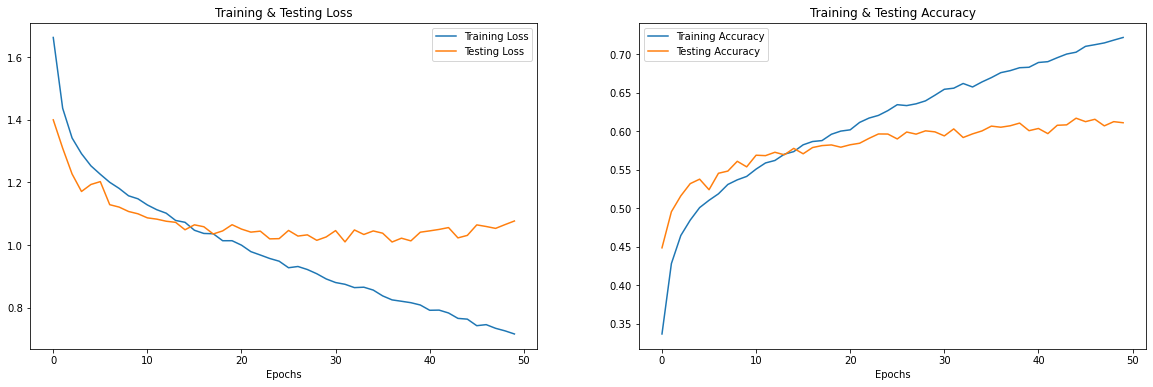

In [71]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [73]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = ohe.inverse_transform(pred_test)

y_test = ohe.inverse_transform(y_test)

286/286 [==============================] - 6s 19ms/step


In [74]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

Predicted Labels Actual Labels
0            happy         happy
1            happy       disgust
2             fear         happy
3              sad       disgust
4             fear           sad
5         surprise      surprise
6          neutral          calm
7            angry       disgust
8            angry       disgust
9          disgust       disgust

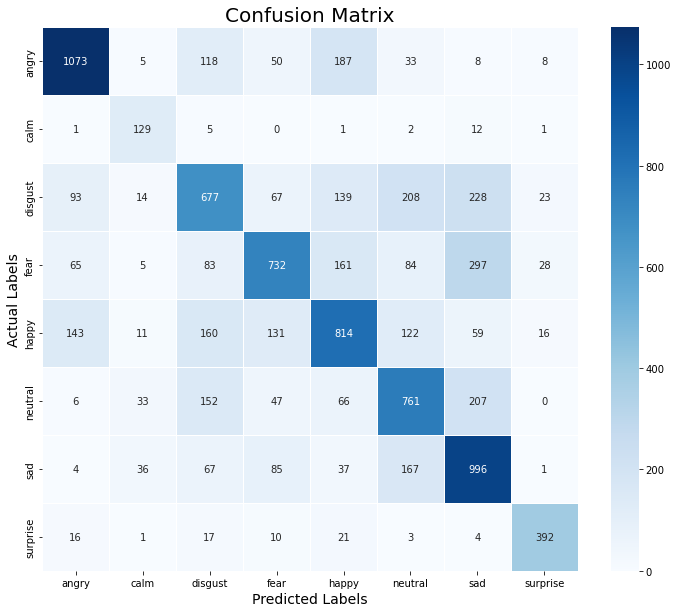

In [77]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in ohe.categories_] , columns = [i for i in ohe.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.77      0.72      0.74      1482
        calm       0.55      0.85      0.67       151
     disgust       0.53      0.47      0.50      1449
        fear       0.65      0.50      0.57      1455
       happy       0.57      0.56      0.56      1456
     neutral       0.55      0.60      0.57      1272
         sad       0.55      0.72      0.62      1393
    surprise       0.84      0.84      0.84       464

    accuracy                           0.61      9122
   macro avg       0.63      0.66      0.63      9122
weighted avg       0.62      0.61      0.61      9122

